# Background about Blight Violation in Detroit 
This information is obtained from the link: https://detroitmi.gov/Portals/0/docs/Brochures/DAH/DAH_Citizen_Guide.pdf

### What is a Blight Violation? 
The City of Detroit has ordinances that address how property owners must maintain the exterior of their property. The City issues a blight violation when an owner fails to follow these ordinances. Examples of blight violations that come before the DAH are:
* <b>Property Maintenance</b>: Failure to obtain certificate of compliance or rental registration, failure to maintain exterior of property, failure to comply with emergency order, rat harborage and failure to remove snow and ice.
* <b>Zoning</b>: Violation of special land use grant, change of use of land without permit, change of use of building without a permit, failure to obtain certificate of maintenance of grant conditions.
* <b>Solid Waste & Illegal Dumping</b>: Early or late placement or improper storage of Courville containers, improper set-out during eviction, improper storage of solid, medial or hazardous waste, improper bulk set-out and illegal dumping
 
### Who issues Blight Violation Notices (BVNs)?
Blight Violation Notices (BVNs) are written tickets issued by City inspectors, police officers, and other City officials who investigate complaints of blight. Blight violation notices are issued to property owners or those in control of property that is in violation of the City’s anti-blight ordinances. If a blight violation notice is issued, the person or entity in receipt is called a respondent.
### What happens when a Blight Violation Notice (BVN) is issued?
The written blight violation notice (BVN) received by a respondent will provide a description of the alleged violation and give the hearing date and time. Once a BVN is issued, the following options are available to the respondent who received the BVN:
* Admit responsibility and pay the fine and fees before the DAH hearing date; fine is reduced 10% for early payment.
* Attend the hearing and contest the blight violation, with or without an attorney.
* If a property owner is found responsible at the hearing, the fine and fees imposed must be paid by the hearing date or a 10% penalty is imposed for late payment.

### What is the DAH Hearing Process?
A respondent who receives a blight violation notice has the right to attend a hearing at the DAH. At the hearing, the respondent may present a defense to the blight violation. DAH hearings are presided over by Administrative Hearing Officers who are licensed Michigan attorneys and independent contractors. At the conclusion of the hearing, the Administrative Hearing Officer will make finding of facts and issue a written Decision and Order and Judgment. A Decision and Order and Judgment issued by the DAH is a state civil judgment and is treated the same as any other state court judgment for enforcement purposes

### What if payment is not made?
If an individual ignores a blight violation notice and doesn’t appear at the hearing, a Decision and Order and Judgment by Default will be issued finding the respondent responsible for the blight violation. If a respondent fails to pay the amount of the Decision and Order and Judgment, collection actions will be commenced, which may include the garnishment of wages, attachment of bank accounts and assets, and imposition of judgment liens upon real property.

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

<b>Note</b>: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

#### Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

####  -------------------------------------------------------------------------------





In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv',encoding = "ISO-8859-1")

/Users/jingjinghuang/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


# Feature Selection

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
# Partition dataset into compliance and non-compliance groups

df_comp    = df[df['compliance'] == 1]
df_NOTcomp = df[df['compliance'] == 0]

No_NOTcomp = df_NOTcomp.shape[0]
No_comp = df_comp.shape[0]

In [5]:
#df_comp

In [6]:
No_NOTcomp

148283

In [7]:
#df['violation_zip_code']

In [8]:
# Delete obviously useless features
# These features are like: violation_zip_code ; violator_name
# violation_street_number

print('violation_zip_code', df['violation_zip_code'].isna().value_counts())
print('violation_zip_code', df['violation_zip_code'].notna().value_counts())

('violation_zip_code', True    250306
Name: violation_zip_code, dtype: int64)
('violation_zip_code', False    250306
Name: violation_zip_code, dtype: int64)


[u'Buildings, Safety Engineering & Env Department' u'Health Department'
 u'Department of Public Works' u'Detroit Police Department'
 u'Neighborhood City Halls']


/Users/jingjinghuang/anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.5.2 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


compliance       
                                                     mean  count
agency_name                                                     
Detroit Police Department                        0.131720   4464
Department of Public Works                       0.089961  52445
Health Department                                0.065851   7107
Buildings, Safety Engineering & Env Department   0.060743  95863
Neighborhood City Halls                          0.000000      1

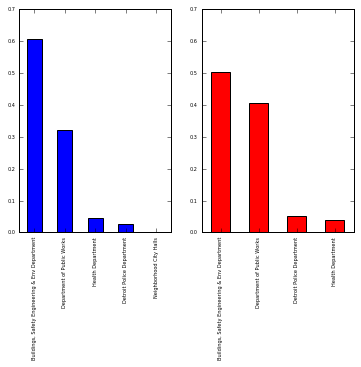

In [9]:
# Check the column, agency_name
# It seems agency_name is not indicative of compliance 

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_ylim([0, 0.7])
ax2.set_ylim([0, 0.7])

(df_NOTcomp['agency_name'].value_counts(normalize=False)/No_NOTcomp).plot.bar(ax=ax1, fontsize=5,color='blue')
(df_comp['agency_name'].value_counts(normalize=False)/No_comp).plot.bar(ax=ax2, fontsize=5,color='red')

print(df['agency_name'].unique())

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['agency_name','compliance']]
df_age_name = df_filter.groupby('agency_name').agg(['mean','count']) 
df_age_name_sort = df_age_name.sort_values(by=[('compliance','mean')],ascending=False)
df_age_name_sort[df_age_name_sort[('compliance','count')] > 0].head(5)

In [10]:
# some inspectors issue blight tickets that
# are more likely to be subject to compliance than others;
# these inspectors may be very strict and responsible

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['inspector_name','compliance']]

df_inpsectors = df_filter.groupby('inspector_name').agg(['mean','count']) 
df_inpsectors_sort = df_inpsectors.sort_values(by=[('compliance','mean')],ascending=False)

#df_inpsectors_sort[df_inpsectors_sort[('compliance','count')] > 200].head(10)
#df_inpsectors_sort[df_inpsectors_sort[('compliance','count')] > 50].tail(5)

In [11]:
#df_inpsectors_sort

In [12]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['violation_street_name','compliance']]

df_vstr_name = df_filter.groupby('violation_street_name').agg(['mean','count']) 
df_vstr_name_sort = df_vstr_name.sort_values(by=[('compliance','mean')],ascending=False)

df_vstr_name_sort[df_vstr_name_sort[('compliance','count')] > 200].head(5)
#df_vstr_name_sort[df_vstr_name_sort[('compliance','count')] > 200].tail(5)

compliance      
                            mean count
violation_street_name                 
MICHIGAN AVE            0.176301   346
EIGHT MILE              0.157641   831
GRATIOT                 0.151796   863
FORT ST                 0.138587   368
ORLEANS                 0.135514   214

In [13]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['mailing_address_str_name','compliance']]

df_madstr_name = df_filter.groupby('mailing_address_str_name').agg(['mean','count']) 
df_madstr_name_sort = df_madstr_name.sort_values(by=[('compliance','mean')],ascending=False)

df_madstr_name_sort[df_madstr_name_sort[('compliance','count')] > 200].head(5)
#df_madstr_name_sort[df_madstr_name_sort[('compliance','count')] > 200].tail(5)

compliance      
                               mean count
mailing_address_str_name                 
WOODWARD                   0.152466   446
FENKELL                    0.137157   401
PLYMOUTH                   0.124481   241
GRATIOT                    0.120482   498
SUSSEX                     0.115625   320

In [14]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['ticket_issued_date','compliance']]

df_tiss_date = df_filter.groupby('ticket_issued_date').agg(['mean','count']) 
df_tiss_date_sort = df_tiss_date.sort_values(by=[('compliance','mean')],ascending=False)

df_tiss_date_sort[df_tiss_date_sort[('compliance','count')] > 10].head(5)
#df_tiss_date_sort[df_tiss_date_sort[('compliance','count')] > 10].tail(5)

compliance      
                          mean count
ticket_issued_date                  
2006-04-18 11:00:00   0.933333    15
2008-04-03 09:00:00   0.923077    13
2008-04-02 09:00:00   0.750000    16
2010-01-27 09:00:00   0.636364    11
2007-01-12 09:30:00   0.600000    15

In [15]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['hearing_date','compliance']]

df_hear_date = df_filter.groupby('hearing_date').agg(['mean','count']) 
df_hear_date_sort = df_hear_date.sort_values(by=[('compliance','mean')],ascending=False)

df_hear_date_sort[df_hear_date_sort[('compliance','count')] > 100].head(5)
#df_hear_date_sort[df_hear_date_sort[('compliance','count')] > 10].tail(5)

compliance      
                          mean count
hearing_date                        
2007-08-07 15:00:00   0.943262   141
2007-08-07 09:00:00   0.849650   286
2007-08-07 10:30:00   0.820856   374
2007-08-07 13:30:00   0.788779   303
2006-06-27 13:30:00   0.096154   104

In [16]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['violation_code','compliance']]


df_v_code = df_filter.groupby('violation_code').agg(['mean','count']) 
df_v_code_sort = df_v_code.sort_values(by=[('compliance','mean')],ascending=False)

df_v_code_sort[df_v_code_sort[('compliance','count')] > 100].head(5)
#df_hear_date_sort[df_hear_date_sort[('compliance','count')] > 10].tail(5)

compliance      
                         mean count
violation_code                     
22-2-61              0.247875   706
9-1-111              0.230769   130
61-81.0100/32.0066   0.166287   439
9-1-103(C)           0.146157  2641
22-2-43              0.132425  2054

In [17]:
df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['violation_description','compliance']]


df_v_descri = df_filter.groupby('violation_description').agg(['mean','count']) 
df_v_descri_sort = df_v_descri.sort_values(by=[('compliance','mean')],ascending=False)

df_v_descri_sort[df_v_descri_sort[('compliance','count')] > 100].head(5)
#df_v_descri_sort[df_v_descri_sort[('compliance','count')] > 100].tail(5)

compliance      
                                                         mean count
violation_description                                              
Failure to secure City or Private solid waste c...   0.260794   579
Failure of owner to remove graffiti or maintain...   0.230769   130
Failing to secure City or Private solid waste c...   0.188976   127
Open Storage/ Residential/ Inoperable Vehicles ...   0.166287   439
Removal of snow and ice from sidewalks               0.146157  2641

In [18]:
# It seems disposition is highly indicative of blight compliance
# Epesically,the Repsonsible (Find Waived) by Deter

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['disposition','compliance']]


df_dispo = df_filter.groupby('disposition').agg(['mean','count']) 
df_dispo_sort = df_dispo.sort_values(by=[('compliance','mean')],ascending=False)

df_dispo_sort[df_dispo_sort[('compliance','count')] > 100].head(5)
#df_dispo_sort[df_dispo_sort[('compliance','count')] > 100].tail(5)

compliance        
                                         mean   count
disposition                                          
Responsible (Fine Waived) by Deter   1.000000     195
Responsible by Determination         0.307300    7644
Responsible by Admission             0.275016   13701
Responsible by Default               0.038203  138340

In [19]:
# if fine_amount is 0.0, then it's always compliant

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['fine_amount','compliance']]

df_fine = df_filter.groupby('fine_amount').agg(['mean','count']) 
df_fine_sort = df_fine.sort_values(by=[('compliance','mean')],ascending=False)

df_fine_sort[df_fine_sort[('compliance','count')] > 100].head(5)

compliance       
                  mean  count
fine_amount                  
0.0           1.000000    195
100.0         0.117123  15488
200.0         0.100000  12710
50.0          0.090620  20415
25.0          0.077649   1378

In [20]:
# if late_fee is 0.0, then it's likely to be compliant

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['late_fee','compliance']]

df_latefee = df_filter.groupby('late_fee').agg(['mean','count']) 
df_latefee_sort = df_latefee.sort_values(by=[('compliance','mean')],ascending=False)

df_latefee_sort[df_latefee_sort[('compliance','count')] > 100].head(5)

compliance       
               mean  count
late_fee                  
0.0        0.362401  15458
10.0       0.069591  12516
20.0       0.060683  11354
5.0        0.057378  17655
35.0       0.039683    126

In [21]:
#df['compliance'].notnull()

In [22]:
# if discount_amount is 0.0, then it's likely NOT be compliant

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['discount_amount','compliance']]

df_dis_amount = df_filter.groupby('discount_amount').agg(['mean','count']) 
df_dis_amount_sort = df_dis_amount.sort_values(by=[('compliance','mean')],ascending=False)

df_dis_amount_sort[df_dis_amount_sort[('compliance','count')] > 100].head(5)

compliance        
                      mean   count
discount_amount                   
25.0              0.970248     605
5.0               0.952096     167
10.0              0.909677     155
20.0              0.903704     135
0.0               0.065999  158700

In [23]:
# if judgment_amount is 140.0, then it's likely NOT be compliant
# if judgment_amount is 0.0, then it's likely to be compliant

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['judgment_amount','compliance']]

df_jud_amount = df_filter.groupby('judgment_amount').agg(['mean','count']) 
df_jud_amount_sort = df_jud_amount.sort_values(by=[('compliance','mean')],ascending=False)

df_jud_amount_sort[df_jud_amount_sort[('compliance','count')] > 100].head(5)

compliance      
                      mean count
judgment_amount                 
0.0               1.000000   195
55.0              0.483871   155
530.0             0.455764   373
1030.0            0.450617   162
230.0             0.429204  1356

In [24]:
# This is ONLY included in training set
# 120269 tickets with payment_amount equals 0.0;
# yet the compliance rate is low, only at 0.001530

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['payment_amount','compliance']]

df_pay_amount = df_filter.groupby('payment_amount').agg(['mean','count']) 
df_pay_amount_sort = df_pay_amount.sort_values(by=[('compliance','mean')],ascending=False)

print(df_pay_amount_sort[df_pay_amount_sort[('compliance','count')] > 120000].head(5))
df_pay_amount_sort[df_pay_amount_sort[('compliance','count')] > 100].head(5)
#df_pay_amount_sort[df_pay_amount_sort[('compliance','count')] > 5].tail(5)

# to plot counts vs payment 
# 
#df_pay_amount = df_pay_amount.reset_index()
#df_pay_amount.plot.bar(x='payment_amount',y=('compliance','count'))

               compliance        
                     mean   count
payment_amount                   
0.0               0.00153  120269


compliance      
                     mean count
payment_amount                 
530.0            0.662953   359
230.0            0.656607  1226
80.0             0.651365  1612
280.0            0.648612  5908
130.0            0.625946  1981

('df_filter.shape', (159880, 2))


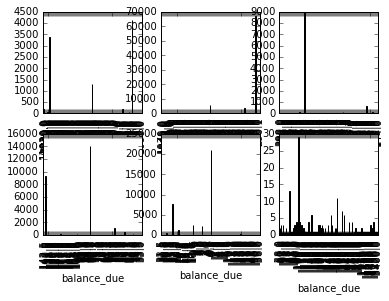

In [25]:
# This is ONLY included in training set
# 

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['balance_due','compliance']]

print('df_filter.shape',df_filter.shape)

df_bal_due = df_filter.groupby('balance_due').agg(['mean','count']) 
df_bal_due_sort = df_bal_due.sort_values(by=[('compliance','mean')],ascending=False)

df_bal_due_sort[df_bal_due_sort[('compliance','count')] > 200]


# plot balance_due vs number (count)
df_bal_due = df_bal_due.reset_index()
df_bal_due_sort = df_bal_due.sort_values(by='balance_due',ascending=False)

fig, axs = plt.subplots(2,3)

df_bal_due_sort[:100].plot.bar(ax=axs[0,0], x='balance_due',y=('compliance','count'),legend=False)
df_bal_due_sort[100:200].plot.bar(ax=axs[0,1], x='balance_due',y=('compliance','count'),legend=False)
df_bal_due_sort[200:300].plot.bar(ax=axs[0,2], x='balance_due',y=('compliance','count'),legend=False)

df_bal_due_sort[300:400].plot.bar(ax=axs[1,0], x='balance_due',y=('compliance','count'),legend=False)
df_bal_due_sort[400:500].plot.bar(ax=axs[1,1], x='balance_due',y=('compliance','count'),legend=False)
df_bal_due_sort[500:600].plot.bar(ax=axs[1,2], x='balance_due',y=('compliance','count'),legend=False)


In [26]:

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['grafitti_status','compliance']]

df_pay_amount = df_filter.groupby('grafitti_status').agg(['mean','count']) 
df_pay_amount_sort = df_pay_amount.sort_values(by=[('compliance','mean')],ascending=False)

df_pay_amount_sort[df_pay_amount_sort[('compliance','count')] > 0].head(5)

Empty DataFrame
Columns: [(compliance, mean), (compliance, count)]
Index: []

In [27]:
#df['grafitti_status']

### In summary, these features are not used for prediction:
* ticket_id
* violator_name (obviously)
* violation_street_number
* violation_zip_code (This is an all-NAN variable)
* mailing_address_str_number 
* agency_name (checked and not relevant)
* city (obviously)
* state (obviously)
* zip_code (obviously)
* non_us_str_code (obviously)
* country (obviously)
* admin_fee (it is always 20.0)
* state_fee (it is always 10.0)
* clean_up_cost (it is always 0.0)
* *payment_date* (not sure about ALL date variables; ONLY in training set)
* payment_amount (this is interesting variable; ONLY in training set)
* payment_status (ONLY in training set)
* balance_due (an interesting variable; ONLY in training set)
* payment_amount (ONLY in training set)
* collection_status (ONLY in training set)
* compliance_detail (ONLY in training set)
* grafitti_status (This is an all-NAN variable)

### These features may be used:
( note: both date and string variables will be tested)
* inspector_name
* violation_street_name
* mailing_address_str_name
* *ticket_issued_date* (how can we use this to predict future observations? different months may have different propensities for blight?)
* *hearing_date* (how can we use this to predict future observations? This seems very relevant !!!)
* violation_code
* violation_description
* disposition
* fine_amount (0.0 or othersize)
* late_fee
* discount_amount
* judgment_amount



In [28]:
df.columns

Index([u'ticket_id', u'agency_name', u'inspector_name', u'violator_name',
       u'violation_street_number', u'violation_street_name',
       u'violation_zip_code', u'mailing_address_str_number',
       u'mailing_address_str_name', u'city', u'state', u'zip_code',
       u'non_us_str_code', u'country', u'ticket_issued_date', u'hearing_date',
       u'violation_code', u'violation_description', u'disposition',
       u'fine_amount', u'admin_fee', u'state_fee', u'late_fee',
       u'discount_amount', u'clean_up_cost', u'judgment_amount',
       u'payment_amount', u'balance_due', u'payment_date', u'payment_status',
       u'collection_status', u'grafitti_status', u'compliance_detail',
       u'compliance'],
      dtype='object')

In [29]:
print(df['inspector_name'].unique().shape)
print(df['violation_street_name'].unique().shape)
print(df['mailing_address_str_name'].unique().shape)
print(df['violation_code'].unique().shape)
print(df['violation_description'].unique().shape)
print(df['disposition'].unique().shape)

(173,)
(1791,)
(37897,)
(235,)
(258,)
(9,)


# Start building models

In [30]:
# Reload the training dataframe
# It is difficult to convert string varibles, such as inspector_name, mailing_address_str_name, 
# violation_street_name, violation_code, and violation_description to numerical variables; and they will 
# be considered later

traindata = pd.read_csv('train.csv',encoding = "ISO-8859-1")
testdata = pd.read_csv('test.csv',encoding = "ISO-8859-1")

#columns_filter = ['ticket_id','violator_name','violation_street_number', 'violation_zip_code', 
#                  'mailing_address_str_number', 'agency_name', 'city', 'state', 'zip_code', 
#                 'non_us_str_code', 'country', 'admin_fee','state_fee', 'clean_up_cost', 'payment_date',
#                 'payment_amount','payment_status','balance_due', 'payment_amount', 'collection_status',
#                 'compliance_detail','grafitti_status']
#traindata.drop(columns_filter,axis = 1,inplace = True)


columns_to_keep = ['disposition','fine_amount','late_fee', 'discount_amount', 'judgment_amount','compliance']
columns_to_keep_test = ['disposition','fine_amount','late_fee', 'discount_amount', 'judgment_amount']

traindata = traindata[columns_to_keep]
testdata = testdata[columns_to_keep_test]

In [31]:
traindata.head(3)

,disposition,fine_amount,late_fee,discount_amount,judgment_amount,compliance
0,Responsible by Default,250.0,25.0,0.0,305.0,0.0
1,Responsible by Determination,750.0,75.0,0.0,855.0,1.0
2,Not responsible by Dismissal,250.0,0.0,0.0,0.0,NaN


In [32]:
traindata['disposition'].unique().shape

(9,)

In [33]:
traindata['disposition'].unique()

array([u'Responsible by Default', u'Responsible by Determination',
       u'Not responsible by Dismissal',
       u'Not responsible by City Dismissal', u'PENDING JUDGMENT',
       u'Responsible by Admission', u'Not responsible by Determination',
       u'SET-ASIDE (PENDING JUDGMENT)',
       u'Responsible (Fine Waived) by Deter'], dtype=object)

In [34]:
traindata.memory_usage().sum()

12014760

In [37]:
# reduce memory usage by casting
for i in range(len(traindata.columns)):
    if len(traindata[traindata.columns[i]].unique()) < 250:
        traindata[traindata.columns[i]] = traindata[traindata.columns[i]].astype('category')

In [38]:
traindata.head(3)

,disposition,fine_amount,late_fee,discount_amount,judgment_amount,compliance
0,Responsible by Default,250.0,25.0,0.0,305.0,0.0
1,Responsible by Determination,750.0,75.0,0.0,855.0,1.0
2,Not responsible by Dismissal,250.0,0.0,0.0,0.0,NaN


In [39]:
traindata.shape

(250306, 6)

In [40]:
traindata.isnull().values.any()

True

In [41]:
# Double check and drop any of the columns and rows that contains NAN

traindata = traindata.dropna(axis=1,how='all')
traindata = traindata.dropna(axis=0,how='all')
traindata = traindata[traindata['compliance'].notnull()]


In [42]:
traindata.shape

# check if there is any row that contains NAN
print(traindata.isnull().values.any())
print(testdata.isnull().values.any())

False
False


In [43]:
traindata.head(3)

,disposition,fine_amount,late_fee,discount_amount,judgment_amount,compliance
0,Responsible by Default,250.0,25.0,0.0,305.0,0.0
1,Responsible by Determination,750.0,75.0,0.0,855.0,1.0
5,Responsible by Default,250.0,25.0,0.0,305.0,0.0


In [44]:
print traindata.disposition.unique()
print '-----------------------------'
print testdata.disposition.unique()

[Responsible by Default, Responsible by Determination, Responsible by Admission, Responsible (Fine Waived) by Deter]
Categories (4, object): [Responsible by Default, Responsible by Determination, Responsible by Admission, Responsible (Fine Waived) by Deter]
-----------------------------
[u'Responsible by Default' u'Responsible by Determination'
 u'Responsible by Admission' u'Responsible (Fine Waived) by Deter'
 u'Responsible (Fine Waived) by Admis'
 u'Responsible - Compl/Adj by Default'
 u'Responsible - Compl/Adj by Determi' u'Responsible by Dismissal']


In [45]:
testdata['disposition'].value_counts()

Responsible by Default                51602
Responsible by Admission               4484
Responsible by Determination           4124
Responsible (Fine Waived) by Deter      781
Responsible - Compl/Adj by Default        6
Responsible - Compl/Adj by Determi        2
Responsible by Dismissal                  1
Responsible (Fine Waived) by Admis        1
Name: disposition, dtype: int64

In [46]:
# to make sure the disposition variable is consistent in both training and testing sets 

traindata['disposition'] = traindata.disposition.astype(str)
testdata['disposition'] = testdata.disposition.astype(str)

testdata = testdata[testdata['disposition'] != 'Responsible (Fine Waived) by Admis'] 
testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Default'] 
testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Determi'] 
testdata = testdata[testdata['disposition'] != 'Responsible by Dismissal'] 


In [47]:
traindata['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'],
      dtype=object)

In [48]:
testdata['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'],
      dtype=object)

In [49]:
traindata.groupby('disposition').agg(['count']) 

,fine_amount,late_fee,discount_amount,judgment_amount,compliance
,count,count,count,count,count
disposition,,,,,
Responsible (Fine Waived) by Deter,195,195,195,195,195
Responsible by Admission,13701,13701,13701,13701,13701
Responsible by Default,138340,138340,138340,138340,138340
Responsible by Determination,7644,7644,7644,7644,7644


In [50]:
testdata.groupby('disposition').agg(['count']) 

,fine_amount,late_fee,discount_amount,judgment_amount
,count,count,count,count
disposition,,,,
Responsible (Fine Waived) by Deter,781,781,781,781
Responsible by Admission,4484,4484,4484,4484
Responsible by Default,51602,51602,51602,51602
Responsible by Determination,4124,4124,4124,4124


In [51]:
# process and transform string_features to two-digit variables

string_features = ['disposition']
traindata =  pd.get_dummies(traindata,columns = string_features,drop_first = False)
testdata =  pd.get_dummies(testdata,columns = string_features,drop_first = False)




In [52]:
traindata.head(3)

,fine_amount,late_fee,discount_amount,judgment_amount,compliance,disposition_Responsible (Fine Waived) by Deter,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination
0,250.0,25.0,0.0,305.0,0.0,0,0,1,0
1,750.0,75.0,0.0,855.0,1.0,0,0,0,1
5,250.0,25.0,0.0,305.0,0.0,0,0,1,0


In [53]:
testdata.head(3)

,fine_amount,late_fee,discount_amount,judgment_amount,disposition_Responsible (Fine Waived) by Deter,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination
0,200.0,20.0,0.0,250.0,0,0,1,0
1,1000.0,100.0,0.0,1130.0,0,0,1,0
2,100.0,10.0,0.0,140.0,0,0,1,0


# Random forests and gradient boosting machines

In [54]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import RandomizedSearchCV
import sklearn
print(sklearn.__version__)

0.17.1


/Users/jingjinghuang/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
y = traindata['compliance']
X = traindata.drop('compliance',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# check the shape of tensors
print(y.shape,X.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((159880,), (159880, 8))
((119910, 8), (39970, 8), (119910,), (39970,))


In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}

In [57]:
random_grid 

{'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}

In [58]:
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
# default metric to optimize over grid parameters: accuracy

reg_RF = RandomForestRegressor()

grid_random_reg_RF = RandomizedSearchCV(estimator = reg_RF, param_distributions = random_grid, \
                               n_iter = 10, cv = 3, verbose=2, random_state=42, \
                                        n_jobs = -1, scoring='roc_auc')


grid_random_reg_RF.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=52, max_features=auto, max_depth=65 ................
[CV] n_estimators=52, max_features=auto, max_depth=65 ................
[CV] n_estimators=52, max_features=auto, max_depth=65 ................
[CV] n_estimators=200, max_features=sqrt, max_depth=98 ...............
[CV] ....... n_estimators=52, max_features=auto, max_depth=65 -   3.7s[CV] ....... n_estimators=52, max_features=auto, max_depth=65 -   3.8s[CV] ....... n_estimators=52, max_features=auto, max_depth=65 -   3.8s


[CV] n_estimators=200, max_features=sqrt, max_depth=98 ...............
[CV] n_estimators=200, max_features=sqrt, max_depth=98 ...............
[CV] n_estimators=52, max_features=sqrt, max_depth=54 ................[CV] n_estimators=52, max_features=sqrt, max_depth=54 ................[CV] n_estimators=52, max_features=sqrt, max_depth=54 ................



KeyboardInterrupt: 

In [822]:
print('Grid best parameter (max. accuracy): ', grid_random_reg_RF.best_params_)
print('Grid best score (roc_auc): ', grid_random_reg_RF.best_score_)

#('Grid best parameter (max. accuracy): ', {'n_estimators': 94, 'max_features': 'sqrt', 'max_depth': 10})
#('Grid best score (accuracy): ', 0.795783917310965)

('Grid best parameter (max. accuracy): ', {'n_estimators': 94, 'max_features': 'sqrt', 'max_depth': 10})
('Grid best score (roc_auc): ', 0.7931824936816614)


In [823]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [14, 12, 10, 8, 6, 4],
    'max_features': ['sqrt'],
    'n_estimators': [80, 85, 90, 94, 95, 100, 105]
     }

reg_RF = RandomForestRegressor()

grid_reg_RF = GridSearchCV(reg_RF, param_grid = param_grid, scoring='roc_auc')
grid_reg_RF.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt'], 'n_estimators': [80, 85, 90, 94, 95, 100, 105], 'max_depth': [14, 12, 10, 8, 6, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [824]:
print('Grid best parameter (max. accuracy): ', grid_reg_RF.best_params_)
print('Grid best score (roc_auc): ', grid_reg_RF.best_score_)

('Grid best parameter (max. accuracy): ', {'max_features': 'sqrt', 'n_estimators': 95, 'max_depth': 6})
('Grid best score (roc_auc): ', 0.7937971684474636)


In [61]:
# Reload the test dataframe

#testdata

    #y_pred = reg_RF.predict(X_test)

In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import RandomizedSearchCV

In [60]:
y = traindata['compliance']
X = traindata.drop('compliance',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# check the shape of tensors
print(y.shape,X.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((159880,), (159880, 8))
((119910, 8), (39970, 8), (119910,), (39970,))


## Search parameters for Gradient Boosting Classifier using RandomCV 

In [114]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 20)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 25]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 20)]
max_depth.append(None)


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [115]:
print random_grid

{'n_estimators': [10, 35, 61, 87, 113, 138, 164, 190, 216, 242, 267, 293, 319, 345, 371, 396, 422, 448, 474, 500], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15], 'max_depth': [2, 7, 13, 19, 24, 30, 36, 41, 47, 53, 58, 64, 70, 75, 81, 87, 92, 98, 104, 110, None]}


In [116]:
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
# default metric to optimize over grid parameters: accuracy; BUT here we use roc_auc

reg_GBM = GradientBoostingClassifier()

grid_random_reg_GBM = RandomizedSearchCV(estimator = reg_GBM, param_distributions = random_grid, \
                               n_iter = 200, cv = 3, verbose=2, random_state=42, \
                                        n_jobs = -1, scoring='roc_auc')


grid_random_reg_GBM.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 99.9min finished


[CV] n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt 
[CV] n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt 
[CV] n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt 
[CV] n_estimators=10, min_samples_split=15, max_depth=30, max_features=auto 
[CV]  n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt - 1.5min[CV]  n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt - 1.5min[CV]  n_estimators=371, min_samples_split=10, max_depth=110, max_features=sqrt - 1.5min[CV]  n_estimators=10, min_samples_split=15, max_depth=30, max_features=auto -   3.4s



[CV] n_estimators=371, min_samples_split=2, max_depth=47, max_features=auto 
[CV] n_estimators=371, min_samples_split=2, max_depth=47, max_features=auto [CV] n_estimators=267, min_samples_split=2, max_depth=41, max_features=auto 
[CV] n_estimators=10, min_samples_split=15, max_depth=30, max_features=auto [CV]  n_estimators=371, min_sa

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 35, 61, 87, 113, 138, 164, 190, 216, 242, 267, 293, 319, 345, 371, 396, 422, 448, 474, 500], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15], 'max_depth': [2, 7, 13, 19, 24, 30, 36, 41, 47, 53, 58, 64, 70, 75, 81, 87, 92, 98, 104, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring='roc_auc', verbose=2)


[CV] n_estimators=500, min_samples_split=10, max_depth=13, max_features=sqrt 

[CV] n_estimators=371, min_samples_split=15, max_depth=13, max_features=sqrt 

[CV]  n_estimators=345, min_samples_split=10, max_depth=98, max_features=sqrt - 1.5min[CV] n_estimators=113, min_samples_split=2, max_depth=81, max_features=sqrt [CV]  n_estimators=371, min_samples_split=15, max_depth=13, max_features=sqrt - 1.5min[CV]  n_estimators=500, min_samples_split=10, max_depth=13, max_features=sqrt - 2.2min



[CV] n_estimators=345, min_samples_split=5, max_depth=87, max_features=auto 
[CV]  n_estimators=113, min_samples_split=2, max_depth=81, max_features=sqrt -  36.0s[CV] n_estimators=474, min_samples_split=15, max_depth=87, max_features=sqrt [CV] n_estimators=113, min_samples_split=5, max_depth=104, max_features=auto [CV]  n_estimators=345, min_samples_split=5, max_depth=87, max_features=auto - 2.0min



[CV] n_estimators=113, min_samples_split=2, max_depth=81, max_features=sqrt 
[CV]  n_estimators=47

In [117]:
print('Grid best parameter (max. accuracy): ', grid_random_reg_GBM.best_params_)
print('Grid best score (roc_auc): ', grid_random_reg_GBM.best_score_)

#('Grid best parameter (max. accuracy): ', {'n_estimators': 115, 'min_samples_split': 5, 'max_depth': 87, 'max_features': 'auto'})
#('Grid best score (roc_auc): ', 0.7920464324802742)

('Grid best parameter (max. accuracy): ', {'n_estimators': 267, 'min_samples_split': 10, 'max_depth': 2, 'max_features': 'sqrt'})
('Grid best score (roc_auc): ', 0.7943394335560708)

[CV] n_estimators=61, min_samples_split=15, max_depth=24, max_features=auto 

[CV] n_estimators=396, min_samples_split=15, max_depth=41, max_features=sqrt 
[CV] n_estimators=35, min_samples_split=15, max_depth=70, max_features=sqrt [CV]  n_estimators=371, min_samples_split=5, max_depth=2, max_features=auto -  23.9s
[CV]  n_estimators=61, min_samples_split=15, max_depth=24, max_features=auto -  20.6s

[CV]  n_estimators=396, min_samples_split=15, max_depth=41, max_features=sqrt - 1.8min
[CV]  n_estimators=35, min_samples_split=15, max_depth=70, max_features=sqrt -   9.0s[CV] n_estimators=345, min_samples_split=2, max_depth=81, max_features=auto 
[CV] n_estimators=242, min_samples_split=10, max_depth=87, max_features=auto 

[CV] n_estimators=422, min_samples_split=10, max_depth=36, max_features=auto 
[CV] n_

### The Grid best parameters from random search:
('Grid best parameter (max. accuracy): ', {'n_estimators': 267, 'min_samples_split': 10, 'max_depth': 2, 'max_features': 'sqrt'})
('Grid best score (roc_auc): ', 0.7943394335560708)

In [119]:

# Create the parameter grid based on the results of random search 

param_grid = { 'n_estimators': [267, 270, 280, 290, 250, 240, 230, 220, 300],
               'max_features': ['auto'],
               'max_depth': [2, 3, 4],
               'min_samples_split': [8, 9, 10]}

reg_GBM = GradientBoostingClassifier()

grid_reg_GBM = GridSearchCV(reg_GBM, param_grid = param_grid, scoring='roc_auc')
grid_reg_GBM.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [267, 270, 280, 290, 250, 240, 230, 220, 300], 'max_features': ['auto'], 'min_samples_split': [8, 9, 10], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [120]:
print('Grid best parameter (max. accuracy): ', grid_reg_GBM.best_params_)
print('Grid best score (roc_auc): ', grid_reg_GBM.best_score_)

#('Grid best parameter (max. accuracy): ', {'n_estimators': 35, 'min_samples_split': 10, 
# 'max_depth': 7, 'max_features': 'auto'})


('Grid best parameter (max. accuracy): ', {'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 280, 'max_depth': 3})
('Grid best score (roc_auc): ', 0.7944637915654558)


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 1. Load the trainset and testset as above

In [63]:
# Reload the trainset and testset

traindata = pd.read_csv('train.csv',encoding = "ISO-8859-1")
testdata = pd.read_csv('test.csv',encoding = "ISO-8859-1")


# add one more feature
columns_to_keep = ['disposition','fine_amount','late_fee', 'discount_amount', 
                   'judgment_amount','hearing_date', 'ticket_issued_date', 'compliance']
columns_to_keep_test = ['disposition','fine_amount','late_fee', 'discount_amount', 
                        'judgment_amount','hearing_date', 'ticket_issued_date']

traindata = traindata[columns_to_keep]
testdata = testdata[columns_to_keep_test]


# reduce memory usage by casting
for i in range(len(traindata.columns)):
    if len(traindata[traindata.columns[i]].unique()) < 250:
        traindata[traindata.columns[i]] = traindata[traindata.columns[i]].astype('category')
        
# Double check and drop any of the columns and rows that contains NAN
traindata = traindata.dropna(axis=1,how='all') # drop columns that contain only Nans
traindata = traindata.dropna(axis=0,how='any') # drop rows that contain at least one Nan
traindata = traindata[traindata['compliance'].notnull()]


# to make sure the disposition variable is same in both training and testing sets 
traindata['disposition'] = traindata.disposition.astype(str)
testdata['disposition'] = testdata.disposition.astype(str)

testdata = testdata[testdata['disposition'] != 'Responsible (Fine Waived) by Admis'] 
testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Default'] 
testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Determi'] 
testdata = testdata[testdata['disposition'] != 'Responsible by Dismissal'] 

# process the date time variables

traindata['hearing_date'] = pd.to_datetime(traindata['hearing_date'])
traindata['ticket_issued_date'] = pd.to_datetime(traindata['ticket_issued_date'])
testdata['hearing_date'] = pd.to_datetime(testdata['hearing_date'])
testdata['ticket_issued_date'] = pd.to_datetime(testdata['ticket_issued_date'])

# compute a new variable date time gap

traindata['time_gap'] = traindata['hearing_date'].subtract(traindata['ticket_issued_date'])
traindata['time_gap'] = traindata['time_gap'].dt.days
traindata.drop(['hearing_date','ticket_issued_date'],axis = 1,inplace = True)
    
testdata['time_gap'] = testdata['hearing_date'].subtract(testdata['ticket_issued_date'])
testdata['time_gap'] = testdata['time_gap'].dt.days
testdata.drop(['hearing_date','ticket_issued_date'],axis = 1,inplace = True)
    
    
# process and transform string_features to two-digit variables

string_features = ['disposition']
traindata =  pd.get_dummies(traindata,columns = string_features,drop_first = False)
testdata =  pd.get_dummies(testdata,columns = string_features,drop_first = False)

In [64]:
traindata.head()

,fine_amount,late_fee,discount_amount,judgment_amount,compliance,time_gap,disposition_Responsible (Fine Waived) by Deter,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination
0,250.0,25.0,0.0,305.0,0.0,369,0,0,1,0
1,750.0,75.0,0.0,855.0,1.0,378,0,0,0,1
5,250.0,25.0,0.0,305.0,0.0,323,0,0,1,0
6,750.0,75.0,0.0,855.0,0.0,253,0,0,1,0
7,100.0,10.0,0.0,140.0,0.0,251,0,0,1,0


### Why hearing_date can be  known prior to the ticket_issue_date? 

In [65]:
# why hearing_date is known prior to the ticket_issue_date? 
traindata[traindata['time_gap'] < 0].head(2)
#traindata[traindata['time_gap'] < 0].shape

,fine_amount,late_fee,discount_amount,judgment_amount,compliance,time_gap,disposition_Responsible (Fine Waived) by Deter,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination
81036,200.0,20.0,0.0,250.0,0.0,-9,0,0,1,0
117989,250.0,25.0,0.0,305.0,0.0,-1,0,0,1,0


# Construct Random Forest Model again

In [66]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import RandomizedSearchCV
import sklearn
print(sklearn.__version__)

0.17.1


In [67]:
y = traindata['compliance']
X = traindata.drop('compliance',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
# double check if any nan presents
traindata.isnull().values.any()

False

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 20)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 20)]
max_depth.append(None)


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [70]:
print random_grid

{'n_estimators': [10, 35, 61, 87, 113, 138, 164, 190, 216, 242, 267, 293, 319, 345, 371, 396, 422, 448, 474, 500], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15], 'max_depth': [2, 7, 13, 19, 24, 30, 36, 41, 47, 53, 58, 64, 70, 75, 81, 87, 92, 98, 104, 110, None]}


In [207]:
'''
reg_RF = RandomForestRegressor()

grid_random_reg_RF = RandomizedSearchCV(estimator = reg_RF, param_distributions = random_grid, \
                               n_iter = 400, cv = 3, verbose=2, random_state=42, \
                                        n_jobs = -1, scoring='roc_auc')


grid_random_reg_RF.fit(X_train, y_train)

'''

"\nreg_RF = RandomForestRegressor()\n\ngrid_random_reg_RF = RandomizedSearchCV(estimator = reg_RF, param_distributions = random_grid,                                n_iter = 400, cv = 3, verbose=2, random_state=42,                                         n_jobs = -1, scoring='roc_auc')\n\n\ngrid_random_reg_RF.fit(X_train, y_train)\n\n"

In [212]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
print n_estimators

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


In [216]:
import scipy

print scipy.stats.expon(scale=100)

In [52]:
#type(traindata['violation_code'].unique()[0])

str

In [60]:
for num in testdata['violation_code'].unique():
    if num not in traindata['violation_code'].unique():
        print num, '#',

19910901 # 22-2-42(b) # 61-5-14 (9) # 9-1-353(1) # 9-1-218 # 9-1-308 # 22-2-84(b)(1) # 61-103.0100/32.0066 # 22-2-92 # 61-112.0100/32.0066 # 61-83.0100/45.0807 # 61-85.0100/32.0066 # 22-2-41(b) # 19410901 # 9-1-444 # 61-5-20 # 9-1-111(a) # 61-104.0100/32.0066 # 61-102.0100/32.0066 # 9-1-111(b) # 61-81.0100/32.0076B # 61-103.0100/32.0031 # 22-2-83(a)(c) # 22-2-48(b) # 22-2-48(a) # 9-1-471 # 22-2-97 # 22-2-88(c) # 22-2-83(e) # 61-119.0100/32.0066 # 61-14-175 # 22-2-83(d)(e) # 61-100.0100 # 61-13-102 #


In [62]:
for num in traindata['violation_code'].unique():
    if num not in testdata['violation_code'].unique():
        print num, '#',

61-63.0600 # 61-63.0500 # 61-63.0100 # 61-47.0000/47.0108 # 61-90.0100 # 61-130.0000/130.0400 # 9-1-210 # 9-1-220 # 9-1-214 # 9-1-477 # 9-1-211 # 9-1-476 # 22-2-20 # 61-80.0100 # 9-1-106 # 61-81.0100/45.0807 # 22-2-87(a) # 22-2-84 (DO NOT USE  # 9-1-207 # 9-1-354 # 9-1-306 # 61-83.0100/32.0066 # 61-111.0100/32.0066 # 61-121.0100/32.0066 # 61-120.0100/32.0066 # 9-1-464 # 9-1-441 # 9-1-441(a) # 9-1-462(a) # 9-1-474 # 9-1-440 # 22-2-53 # 9-1-81(b) # 9-1-331 # 9-1-442 # 9-1-351 # 9-1-406 # 22-2-97(b) # 9-1-478 # 9-1-439 # 9-1-375 # 9-1-465 # 9-1-443(a) # 9-1-305 # 9-1-443(b) # 9-1-45(c) # 9-1-46(a) # 9-1-405 # 9-1-219 # 61-114.0100 # 22-2-42 # 9-1-307 # 19840901 # 9-1-377 # 19850901 # 9-1-353(2) # 9-1-333 # 22-3-2 # 61-8-47 # 9-1-352 # 9-1-203 # 22-2-21(a) # 61-86.0100/32.0076B # 61-82.0100/32.0031 # 61-104.0100 # 9-1-503 # 61-86.0100/45.0807 # 61-45.0000/45.0800 # 9-1-502 # 61-84.0100/45.0807 # 9-1-434 # 20160901 #


In [23]:

traindata['hearing_date'] = pd.to_datetime(traindata['hearing_date'])
traindata['ticket_issued_date'] = pd.to_datetime(traindata['ticket_issued_date'])
testdata['hearing_date'] = pd.to_datetime(testdata['hearing_date'])
testdata['ticket_issued_date'] = pd.to_datetime(testdata['ticket_issued_date'])

(3, 244)

In [24]:
testdata.head(3).shape

(3, 159)

### These features may be used:
( note: both date and string variables will be tested)
* inspector_name
* violation_street_name
* mailing_address_str_name
* *ticket_issued_date* (how can we use this to predict future observations? different months may have different propensities for blight?)
* *hearing_date* (how can we use this to predict future observations? This seems very relevant !!!)
* violation_code
* violation_description
* disposition
* fine_amount (0.0 or othersize)
* late_fee
* discount_amount
* judgment_amount

In [13]:
df = pd.read_csv('train.csv',encoding = "ISO-8859-1")


In [14]:
print(df['inspector_name'].unique().shape)
print(df['violation_street_name'].unique().shape)
print(df['mailing_address_str_name'].unique().shape)
print(df['violation_code'].unique().shape)
print(df['violation_description'].unique().shape)
print(df['disposition'].unique().shape)



(173,)
(1791,)
(37897,)
(235,)
(258,)
(9,)


In [16]:
#df['violation_description'].unique()


In [17]:
df.shape


(250306, 34)

In [32]:
# Reload the trainset and testset

traindata = pd.read_csv('train.csv',encoding = "ISO-8859-1")
testdata = pd.read_csv('test.csv',encoding = "ISO-8859-1")


# add one more feature
columns_to_keep = ['disposition','fine_amount','late_fee', 'discount_amount', 
                   'judgment_amount','violation_description', 'compliance']
columns_to_keep_test = ['disposition','fine_amount','late_fee', 'discount_amount', 
                        'judgment_amount','violation_description']

traindata = traindata[columns_to_keep]
testdata = testdata[columns_to_keep_test]


# reduce memory usage by casting
for i in range(len(traindata.columns)):
    if len(traindata[traindata.columns[i]].unique()) < 250:
        traindata[traindata.columns[i]] = traindata[traindata.columns[i]].astype('category')
        
# Double check and drop any of the columns and rows that contains NAN
traindata = traindata.dropna(axis=1,how='all')
traindata = traindata.dropna(axis=0,how='all')
traindata = traindata[traindata['compliance'].notnull()]


In [39]:
traindata['violation_description'].unique().shape


KeyError: 'violation_description'

In [38]:
testdata['violation_description'].unique().shape


KeyError: 'violation_description'

 <br>
 <br>
# The best RandomForest model so far...
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 ### 1. Loading and processing datasets

In [212]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
import sklearn

print(sklearn.__version__)

# read the two datasets
traindata = pd.read_csv('train.csv',encoding = "ISO-8859-1")
testdata = pd.read_csv('test.csv',encoding = "ISO-8859-1")

# add one more feature
columns_to_keep = ['disposition','fine_amount','late_fee', 'discount_amount',
                   'judgment_amount','hearing_date', 'ticket_issued_date', 'compliance']
columns_to_keep_test = ['disposition','fine_amount','late_fee', 'discount_amount',
                        'judgment_amount','hearing_date', 'ticket_issued_date']

traindata = traindata[columns_to_keep]
testdata = testdata[columns_to_keep_test]

# reduce memory usage by casting
for i in range(len(traindata.columns)):
    if len(traindata[traindata.columns[i]].unique()) < 250:
        traindata[traindata.columns[i]] = traindata[traindata.columns[i]].astype('category')

# Double check and drop any of the columns and rows that contains NAN
traindata = traindata.dropna(axis=1,how='all') # drop columns that contain only Nans
traindata = traindata.dropna(axis=0,how='any') # drop rows that contain at least one Nan
traindata = traindata[traindata['compliance'].notnull()]


# to make sure the disposition variable is same in both training and testing sets 
traindata['disposition'] = traindata.disposition.astype(str)
testdata['disposition'] = testdata.disposition.astype(str)

print('testdata-shape', testdata.shape)

#testdata = testdata[testdata['disposition'] != 'Responsible (Fine Waived) by Admis']
#testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Default']
#testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Determi']
#testdata = testdata[testdata['disposition'] != 'Responsible by Dismissal']
testdata['disposition'].replace(['Responsible (Fine Waived) by Admis'], 'Responsible by Admission',inplace=True)
testdata['disposition'].replace(['Responsible - Compl/Adj by Default'], 'Responsible by Default',inplace=True)
testdata['disposition'].replace(['Responsible - Compl/Adj by Determi'], 'Responsible by Determination',inplace=True)
testdata['disposition'].replace(['Responsible by Dismissal'], 'Responsible (Fine Waived) by Deter',inplace=True)


print('testdata-shape', testdata.shape)

# process the date time variables
traindata['hearing_date'] = pd.to_datetime(traindata['hearing_date'])
traindata['ticket_issued_date'] = pd.to_datetime(traindata['ticket_issued_date'])
testdata['hearing_date'] = pd.to_datetime(testdata['hearing_date'])
testdata['ticket_issued_date'] = pd.to_datetime(testdata['ticket_issued_date'])


# compute a new variable date time gap
traindata['time_gap'] = traindata['hearing_date'].subtract(traindata['ticket_issued_date'])
traindata['time_gap'] = traindata['time_gap'].dt.days
traindata.drop(['hearing_date','ticket_issued_date'],axis = 1,inplace = True)
testdata['time_gap'] = testdata['hearing_date'].subtract(testdata['ticket_issued_date'])
testdata['time_gap'] = testdata['time_gap'].dt.days
testdata.drop(['hearing_date','ticket_issued_date'],axis = 1,inplace = True)

# process and transform string_features to two-digit variables
string_features = ['disposition']
traindata =  pd.get_dummies(traindata,columns = string_features,drop_first = False)
testdata =  pd.get_dummies(testdata,columns = string_features,drop_first = False)


y = traindata['compliance']
X = traindata.drop('compliance',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)



0.17.1
('testdata-shape', (61001, 7))
('testdata-shape', (61001, 7))


In [213]:
print X_train.shape, X_test.shape,testdata.shape

(119739, 9) (39914, 9) (61001, 9)


### 2. Other simple models as baseline

In [214]:
# some other models as baselines

from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
ypred = dummy_clf.predict(X_test)

print dummy_clf.score(X_test,y_test),dummy_clf.score(X_train,y_train),roc_auc_score(y_test,ypred)

from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
y_pred = nbclf.predict(X_test)

print roc_auc_score(y_test,y_pred),nbclf.score(X_test, y_test),(nbclf.score(X_train, y_train))

0.928847021095355 0.9282522820467851 0.5
0.7260715626227561 0.876785087939069 0.8750448893008961


In [174]:
np.sum(y_pred)

5339.0

### 3. Run GridSearchCV to attain paramters - (double check)

In [175]:
# Create the random grid
param_grid =  {'n_estimators': [80],
               'max_features': ['sqrt'],
               'max_depth': [8],
               'min_samples_split': [6]}


reg_RF = RandomForestRegressor()

grid_reg_RF = GridSearchCV(reg_RF, param_grid = param_grid, n_jobs=-1, scoring='roc_auc')

grid_reg_RF.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [80], 'max_features': ['sqrt'], 'min_samples_split': [6], 'max_depth': [8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [176]:
print('Grid best parameter (max. roc_auc): ', grid_reg_RF.best_params_)
print('Grid best score (roc_auc): ', grid_reg_RF.best_score_)

('Grid best parameter (max. roc_auc): ', {'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 80, 'max_depth': 8})
('Grid best score (roc_auc): ', 0.8024721670244276)


### 4. Build Random Forest using the parameters

In [177]:
# 0.8000819277656926
#reg_RF = RandomForestRegressor(n_estimators=80,min_samples_split=6, max_features='sqrt',max_depth=8)

# 0.8041931516203397
reg_RF = RandomForestRegressor(n_estimators=160,min_samples_split=4, max_features='sqrt',max_depth=8)


reg_RF.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [178]:
ypred_train = reg_RF.predict(X_train)
ypred_test = reg_RF.predict(X_test)

print roc_auc_score(y_train,ypred_train), roc_auc_score(y_test,ypred_test)

0.8106690949361832 0.7999924138519074


In [179]:
#ypred_train = np.array([1 if n >= 0.5 else 0 for n in ypred_train])
#ypred_test = np.array([1 if n >= 0.5 else 0 for n in ypred_test])

In [180]:
print roc_auc_score(y_train,ypred_train), roc_auc_score(y_test,ypred_test)
#print reg_RF.score(X_test,y_test),reg_RF.score(X_train,y_train)

0.8106690949361832 0.7999924138519074


In [181]:
print roc_auc_score(y_train,ypred_train), roc_auc_score(y_test,ypred_test)
print reg_RF.score(X_test,y_test),reg_RF.score(X_train,y_train)

0.8106690949361832 0.7999924138519074
0.26404165400561797 0.2738704534534059


### 5. Make predictions for the test.set

In [220]:
testdata_full = pd.read_csv('test.csv',encoding = "ISO-8859-1")

In [215]:
testdata = testdata.fillna(value=0)
test_pred = reg_RF.predict(testdata)

In [221]:
#df_output
df_output = pd.DataFrame(test_pred, index=testdata_full['ticket_id'])

In [222]:
df_output.head()

,0
ticket_id,
284932,0.062335
285362,0.012723
285361,0.072390
285338,0.059121
285346,0.069831


 <br>
 <br>
 <br>

# Model Diagnostics - How to improve the performance



 <br>
 <br>
 <br>
 <br> 
 <br>
 <br>


In [166]:
# read the two datasets
traindata = pd.read_csv('train.csv',encoding = "ISO-8859-1")
testdata = pd.read_csv('test.csv',encoding = "ISO-8859-1")

# add one more feature
columns_to_keep = ['disposition','fine_amount','late_fee', 'discount_amount',
                   'judgment_amount','hearing_date', 'ticket_issued_date', 'compliance']
columns_to_keep_test = ['disposition','fine_amount','late_fee', 'discount_amount',
                        'judgment_amount','hearing_date', 'ticket_issued_date']

traindata = traindata[columns_to_keep]
testdata = testdata[columns_to_keep_test]


# reduce memory usage by casting
for i in range(len(traindata.columns)):
    if len(traindata[traindata.columns[i]].unique()) < 250:
        traindata[traindata.columns[i]] = traindata[traindata.columns[i]].astype('category')

# Double check and drop any of the columns and rows that contains NAN
traindata = traindata.dropna(axis=1,how='all') # drop columns that contain only Nans
traindata = traindata.dropna(axis=0,how='any') # drop rows that contain at least one Nan
traindata = traindata[traindata['compliance'].notnull()]


# to make sure the disposition variable is same in both training and testing sets 
traindata['disposition'] = traindata.disposition.astype(str)
testdata['disposition'] = testdata.disposition.astype(str)

print('testdata-shape', testdata.shape)

#testdata = testdata[testdata['disposition'] != 'Responsible (Fine Waived) by Admis']
#testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Default']
#testdata = testdata[testdata['disposition'] != 'Responsible - Compl/Adj by Determi']
#testdata = testdata[testdata['disposition'] != 'Responsible by Dismissal']
testdata['disposition'].replace(['Responsible (Fine Waived) by Admis'], 'Responsible by Admission',inplace=True)
testdata['disposition'].replace(['Responsible - Compl/Adj by Default'], 'Responsible by Default',inplace=True)
testdata['disposition'].replace(['Responsible - Compl/Adj by Determi'], 'Responsible by Determination',inplace=True)
testdata['disposition'].replace(['Responsible by Dismissal'], 'Responsible (Fine Waived) by Deter',inplace=True)





('testdata-shape', (61001, 7))


In [164]:
#testdata

In [169]:
testdata[testdata['disposition'] == 'Responsible (Fine Waived) by Admis']

,disposition,fine_amount,late_fee,discount_amount,judgment_amount,hearing_date,ticket_issued_date


In [148]:
#testdata[testdata['disposition'] == 'Responsible (Fine Waived) by Admis']['disposition']

17038    Responsible (Fine Waived) by Admis
Name: disposition, dtype: object

In [146]:
traindata['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'],
      dtype=object)